# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [1]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow pandas

  Using cached https://files.pythonhosted.org/packages/31/9f/042db462417451e81035c3d43b722e88450c628a33dfda69777a801b0d40/scikit_learn-0.20.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/32/6b/0368cfa5e1d1ae169ab7dc78addda3fd5e6262e48d7373a9114bac7caff7/matplotlib-2.2.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1b/08/ff620ef5a6128ee6e7a505f5716f81fce7b71f3a69e99646ebe64e0b9984/Pillow-6.2.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1d/f6/7c16d60aeb3694e5611976cb4f1eaf1c6b7f1e7c55771d691013405a02ea/scipy-1.2.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d7/b1/3367ea1f372957f97a6752ec725b87886e12af1415216feec9067e31df70/numpy-1.16.5-cp27-cp27

In [2]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [3]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [4]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [5]:
# Loading the dataset
# eg.
dirpath = './dataset/IMFDB/'
#dirpath = './dataset/IIIT-CFW/'
#dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32, 3)


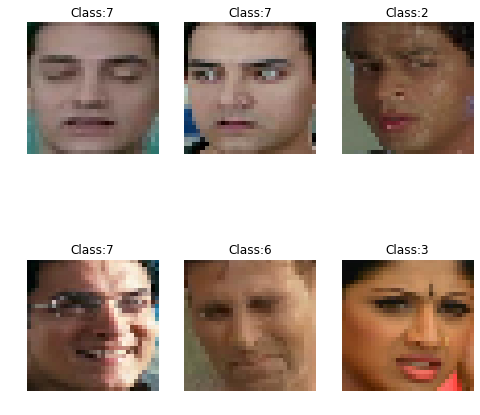

In [6]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [7]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [8]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return X_k

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [9]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_k = kpca.fit_transform(X)
    return X_k

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [10]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [11]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X,y)
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [12]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [13]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

___________________________

- Eigen faces is the name given to a set of eigen vectors when they are used in the problem of face recognition. Precisely, the eigen vectors that are computed from the covariance matrix of the data set (containing images of faces) are called eigen faces 

1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [14]:
# Compute your features 
# eg.
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

X_3D = get_kernel_lda(X,y,3)

Dataset shape: (400, 32, 32, 3)


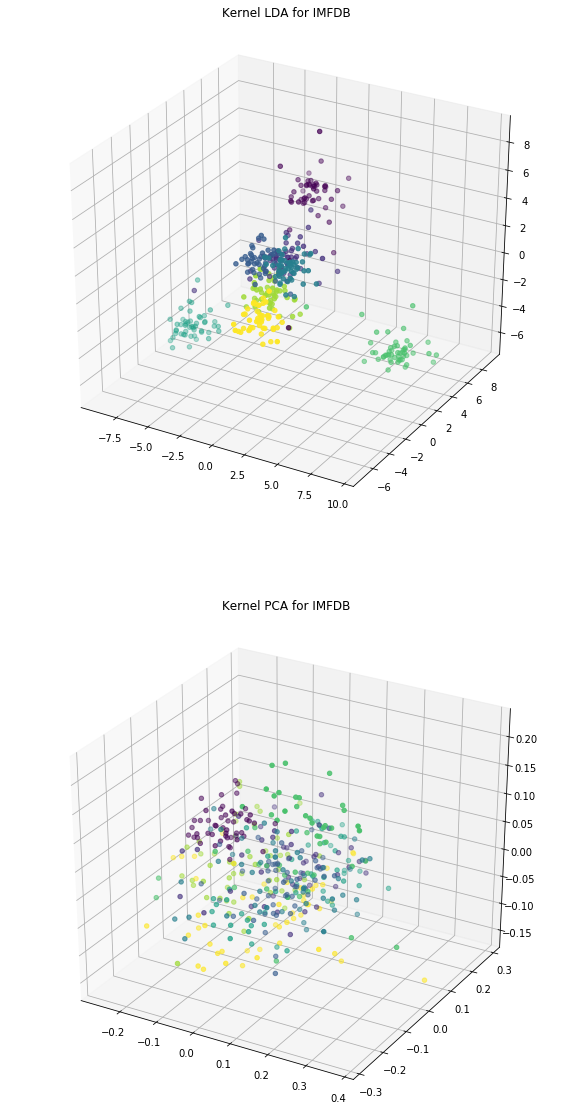

In [15]:
# Create a scatter plot  
# eg.
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(10,20))
X_3D = get_kernel_lda(X,y,3)
ax = fig.add_subplot(211, projection='3d')
ax.title.set_text('Kernel LDA for IMFDB')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

X_3D = get_kernel_pca(X,3)
ax = fig.add_subplot(212, projection='3d')
ax.title.set_text('Kernel PCA for IMFDB')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

plt.show()

In [16]:
# Compute your features 
# eg.
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

X_3D = get_kernel_lda(X,y,3)

Dataset shape: (672, 32, 32, 3)


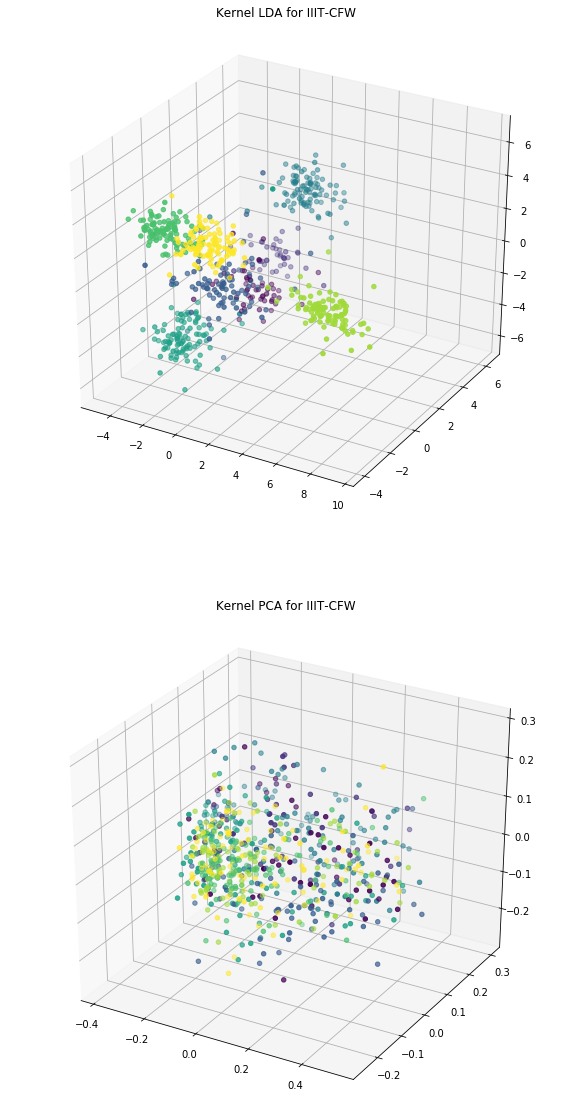

In [17]:
# Create a scatter plot  
# eg.
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(10,20))
X_3D = get_kernel_lda(X,y,3)
ax = fig.add_subplot(211, projection='3d')
ax.title.set_text('Kernel LDA for IIIT-CFW')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

X_3D = get_kernel_pca(X,3)
ax = fig.add_subplot(212, projection='3d')
ax.title.set_text('Kernel PCA for IIIT-CFW')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

plt.show()

In [18]:
# Compute your features 
# eg.
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))


Dataset shape: (165, 32, 32, 3)


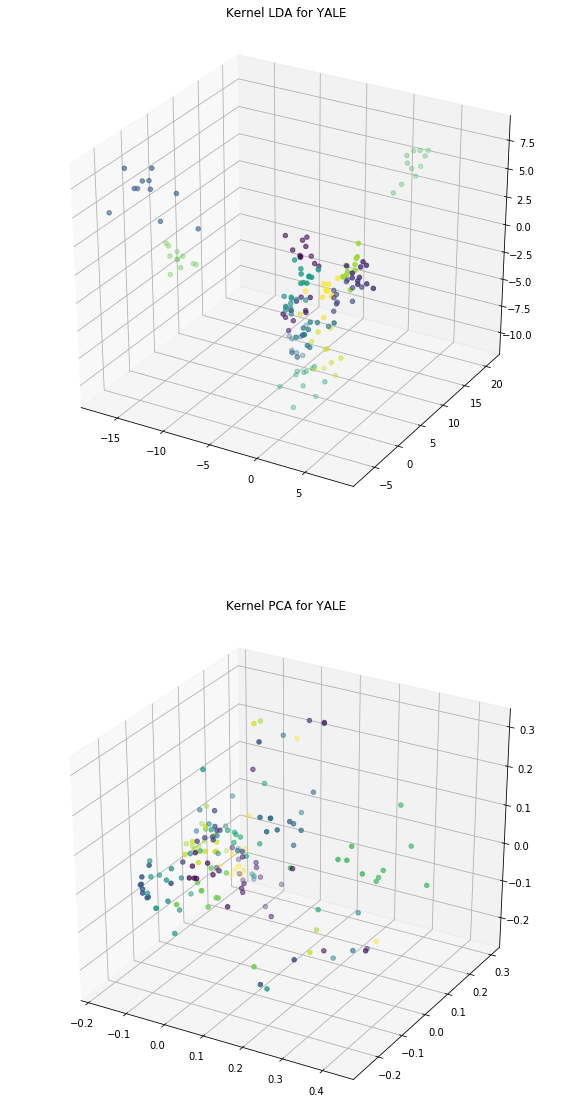

In [19]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(10,20))
X_3D = get_kernel_lda(X,y,3)
ax = fig.add_subplot(211, projection='3d')
ax.title.set_text('Kernel LDA for YALE')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

X_3D = get_kernel_pca(X,3)
ax = fig.add_subplot(212, projection='3d')
ax.title.set_text('Kernel PCA for YALE')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

plt.show()

Dataset shape: (400, 32, 32, 3)


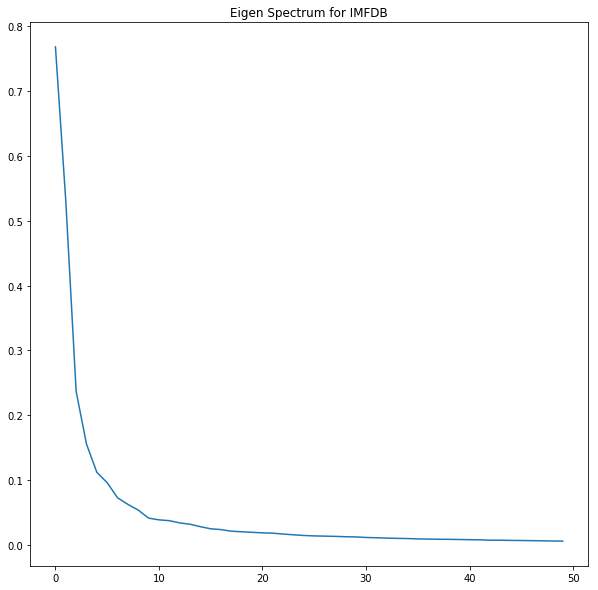

Number of eigen vectors sufficient to represent IMFDB Data =  124


In [20]:
# Plot the eigen value spectrum
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

cov = np.cov(X.T)
from numpy import linalg as LA
eig_values, eig_vectors = LA.eig(cov)

idx = eig_values.argsort()[::-1]   
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

eig_values = eig_values / LA.norm(eig_values)
plt.figure(figsize=(10,10))
plt.plot(eig_values[0:50].real)
plt.title('Eigen Spectrum for IMFDB')
plt.show()

s = 0
cnt = 0
for j in eig_values:
    s = s + j.real
    cnt = cnt + 1
    if ((s*1.0)/sum(eig_values.real)) >= 0.95:
        break
print("Number of eigen vectors sufficient to represent IMFDB Data = ", cnt)

Dataset shape: (672, 32, 32, 3)


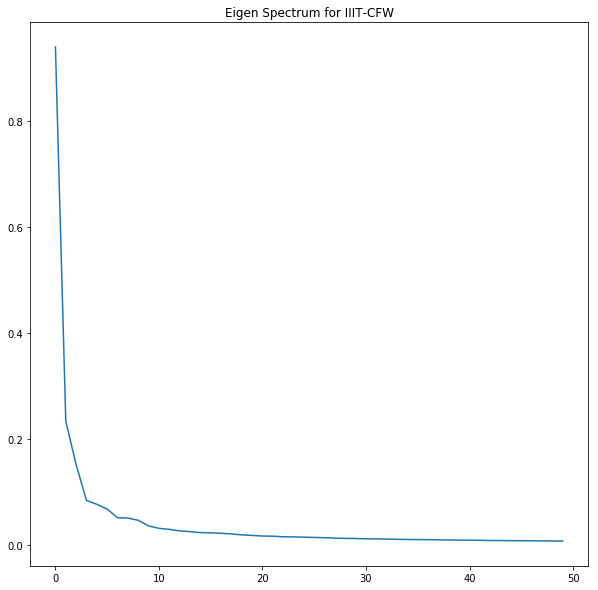

Number of eigen vectors sufficient to represent IIIT-CFW Data =  309


In [21]:
# Plot the eigen value spectrum
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

cov = np.cov(X.T)
from numpy import linalg as LA
eig_values, eig_vectors = LA.eig(cov)

idx = eig_values.argsort()[::-1]   
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

eig_values = eig_values / LA.norm(eig_values)
plt.figure(figsize=(10,10))
plt.plot(eig_values[0:50].real)
plt.title('Eigen Spectrum for IIIT-CFW')
plt.show()


s = 0
cnt = 0
for j in eig_values:
    s = s + j.real
    cnt = cnt + 1
    if ((s*1.0)/sum(eig_values.real)) >= 0.95:
        break
print("Number of eigen vectors sufficient to represent IIIT-CFW Data = ", cnt)

Dataset shape: (165, 32, 32, 3)


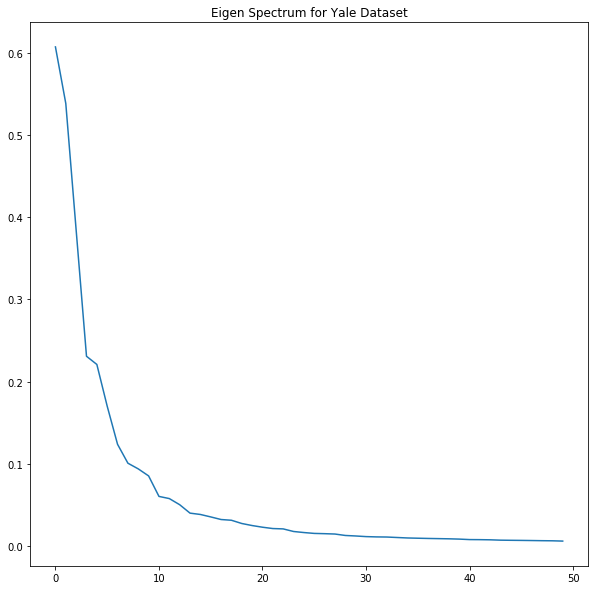

Number of eigen vectors sufficient to represent Yale Data =  62


In [22]:
# Plot the eigen value spectrum
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

cov = np.cov(X.T)
from numpy import linalg as LA
eig_values, eig_vectors = LA.eig(cov)

idx = eig_values.argsort()[::-1]   
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

eig_values = eig_values / LA.norm(eig_values)
plt.figure(figsize=(10,10))
plt.plot(eig_values[0:50].real)
plt.title('Eigen Spectrum for Yale Dataset')
plt.show()

s = 0
cnt = 0
for j in eig_values:
    s = s + j.real
    cnt = cnt + 1
    if ((s*1.0)/sum(eig_values.real)) >= 0.95:
        break
print("Number of eigen vectors sufficient to represent Yale Data = ", cnt)

- Eigen values with their corresponding eigen vectors are sorted according to decreasing order of eigen values.
- First 124 eigen vectors are sufficient to represent the IMFDB data
- First 309 eigen vectors are sufficient to represent the IIIT-CFW data
- First 62 eigen vectors are sufficient to represent the Yale dataset
- If sum of first d eigen values when divided by total sum of all eigen values exceeds 0.95, we say the dataset is sufficient to represent using only d eigen vectors

1(c). Reconstruct  the  image  back for each case


In [23]:
def reconstruct_images(**kwargs):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    data = []
    labels = []
    components = -1
    for keys, values in kwargs.items():
        if keys == 'data':
            data = values
        if keys == 'labels':
            labels = values
        if keys == 'components':
            components = values
    reconstruct_X = None
    for keys, values in kwargs.items():
        if keys == 'get_pca' and values == True:
            pca = PCA(n_components = min(components, min(data.shape[0], data.shape[1])), svd_solver='full')
            X_compressed = pca.fit_transform(data)
            reconstruct_X = pca.inverse_transform(X_compressed)
            return reconstruct_X
        elif keys == 'get_lda' and values == True:
            return reconstruct_X
        elif keys == 'get_kernel_lda' and values == True:
            #reconstruct_X = get_kernel_lda()
            return reconstruct_X
        elif keys == 'get_kernel_pca' and values == True:
            kpca = KernelPCA(n_components=components,kernel='rbf',degree=3, fit_inverse_transform=True)
            X_k = kpca.fit_transform(X)
            reconstruct_X = kpca.inverse_transform(X_k)
            return reconstruct_X
    return reconstruct_X    

Dataset shape: (400, 32, 32, 3)
*****************************IMFDB Dataset*******************************

               KPCA with 3 dimensions and rbf kernel                    


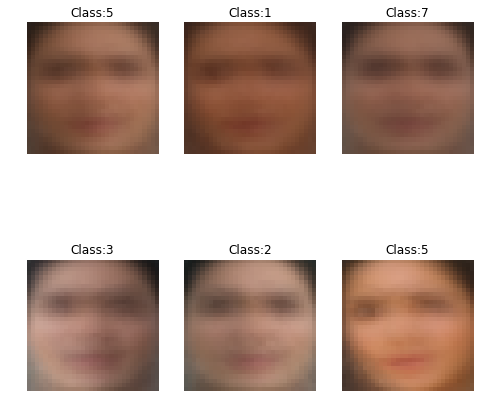

Reconstruction Error for IMFDB Dataset using KPCA =  0.1286479308624965


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



                      PCA with 124 dimensions                           


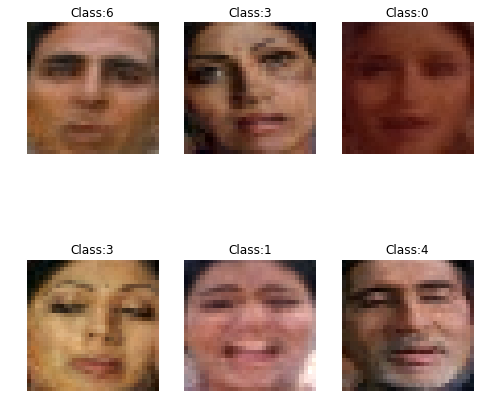

Reconstruction Error for IMFDB Dataset using PCA =  0.038415653971218974


In [24]:
# Display results 
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("*****************************IMFDB Dataset*******************************")

X_reconstructed = reconstruct_images(data = X, labels = y, get_kernel_pca = True, components = 3)
print("\n               KPCA with 3 dimensions and rbf kernel                    ")
# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction Error for IMFDB Dataset using KPCA = ", np.sqrt(np.mean((X - X_reconstructed)**2)))


X_reconstructed = reconstruct_images(data = X, labels = y, get_pca = True, components = 124)

print("\n                      PCA with 124 dimensions                           ")
# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction Error for IMFDB Dataset using PCA = ", np.sqrt(np.mean((X - X_reconstructed)**2)))

Dataset shape: (672, 32, 32, 3)
***************************IIIT-CFW Dataset*****************************


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



               KPCA with 3 dimensions and rbf kernel                    


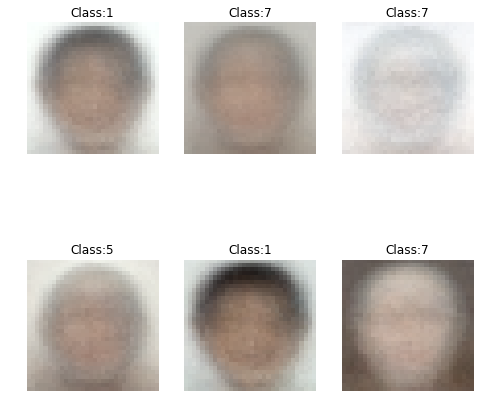

Reconstruction Error for IIIT-CFW Dataset using KPCA =  0.235301263971165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



                      PCA with 309 dimensions                           


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


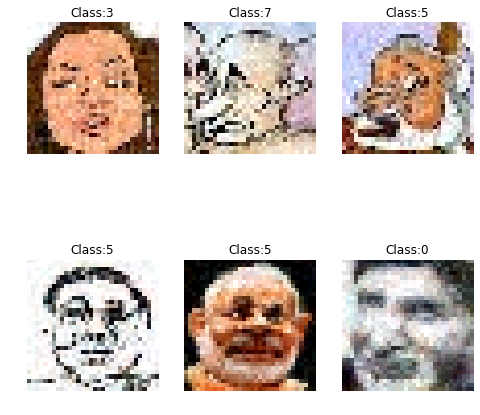

Reconstruction Error for IIIT-CFW Dataset using PCA =  0.06760359785636723


In [25]:
# Display results
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("***************************IIIT-CFW Dataset*****************************")

X_reconstructed = reconstruct_images(data = X, labels = y, get_kernel_pca = True, components = 3)
print("\n               KPCA with 3 dimensions and rbf kernel                    ")
# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction Error for IIIT-CFW Dataset using KPCA = ", np.sqrt(np.mean((X - X_reconstructed)**2)))


X_reconstructed = reconstruct_images(data = X, labels = y, get_pca = True, components = 309)

print("\n                      PCA with 309 dimensions                           ")
# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction Error for IIIT-CFW Dataset using PCA = ", np.sqrt(np.mean((X - X_reconstructed)**2)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset shape: (165, 32, 32, 3)
***************************Yale Face Dataset*****************************

               KPCA with 3 dimensions and rbf kernel                    


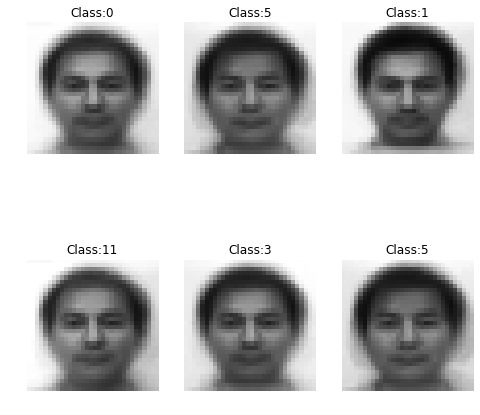

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction Error for Yale Face Dataset using KPCA =  0.19137866603583906

                      PCA with 62 dimensions                           


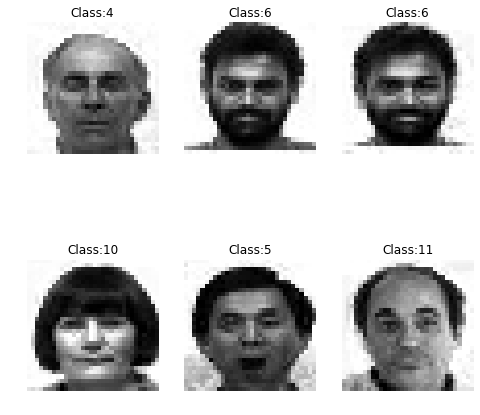

Reconstruction Error for Yale Face Dataset using PCA =  0.05367886954170609


In [26]:
# Display results
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("***************************Yale Face Dataset*****************************")

X_reconstructed = reconstruct_images(data = X, labels = y, get_kernel_pca = True, components = 3)
print("\n               KPCA with 3 dimensions and rbf kernel                    ")
# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction Error for Yale Face Dataset using KPCA = ", np.sqrt(np.mean((X - X_reconstructed)**2)))


X_reconstructed = reconstruct_images(data = X, labels = y, get_pca = True, components = 62)

print("\n                      PCA with 62 dimensions                           ")
# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y[ind],row=2,col=3)

# Show the reconstruction error
print("Reconstruction Error for Yale Face Dataset using PCA = ", np.sqrt(np.mean((X - X_reconstructed)**2)))

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

In [27]:
# code goes here
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

max_class = -1
min_class = 10000000
for i in y:
    max_class = max(max_class, i)
    min_class = min(min_class, i)
class_label = -1
mi = -1
for i in range(min_class, max_class + 1):
    dataset = []
    labels = []
    for j in range(X.shape[0]):
        if y[j] == i:
            dataset.append(X[j])
            labels.append(y[j])
    dataset = np.array(dataset)
    labels = np.array(labels)
    X_reconstructed = reconstruct_images(data = dataset, labels = labels, get_pca = True, components = 35)
    reconstruction_error = np.sqrt(np.mean((dataset - X_reconstructed)**2))
    #print(reconstruction_error)
    if reconstruction_error > mi:
        mi = reconstruction_error
        class_label = i
ans = ""
for keys, values in imfdb_dict.items():
    if values == class_label:
        ans = keys
print(ans + "\'s image is most difficult to represent compactly with few eigen vectors in the IMFDB Dataset")

Dataset shape: (400, 32, 32, 3)
AmitabhBachan's image is most difficult to represent compactly with few eigen vectors in the IMFDB Dataset


In [28]:
# code goes here
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

max_class = -1
min_class = 10000000
for i in y:
    max_class = max(max_class, i)
    min_class = min(min_class, i)
class_label = -1
mi = -1
for i in range(min_class, max_class + 1):
    dataset = []
    labels = []
    for j in range(X.shape[0]):
        if y[j] == i:
            dataset.append(X[j])
            labels.append(y[j])
    dataset = np.array(dataset)
    labels = np.array(labels)
    X_reconstructed = reconstruct_images(data = dataset, labels = labels, get_pca = True, components = 40)
    reconstruction_error = np.sqrt(np.mean((dataset - X_reconstructed)**2))
    #print(reconstruction_error)
    if reconstruction_error > mi:
        mi = reconstruction_error
        class_label = i
ans = ""
for keys, values in cfw_dict.items():
    if values == class_label:
        ans = keys
print(ans + "\'s image is most difficult to represent compactly with few eigen vectors in the IIIT-CFW Dataset")

Dataset shape: (672, 32, 32, 3)
NarendraModi's image is most difficult to represent compactly with few eigen vectors in the IIIT-CFW Dataset


In [29]:
# code goes here
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

max_class = -1
min_class = 10000000
for i in y:
    max_class = max(max_class, i)
    min_class = min(min_class, i)
class_label = -1
mi = -1
for i in range(min_class, max_class + 1):
    dataset = []
    labels = []
    for j in range(X.shape[0]):
        if y[j] == i:
            dataset.append(X[j])
            labels.append(y[j])
    dataset = np.array(dataset)
    labels = np.array(labels)
    X_reconstructed = reconstruct_images(data = dataset, labels = labels, get_pca = True, components = 40)
    reconstruction_error = np.sqrt(np.mean((dataset - X_reconstructed)**2))
    #print(reconstruction_error)
    if reconstruction_error > mi:
        mi = reconstruction_error
        class_label = i
ans = class_label
print("Class " + str(ans) + " images are most difficult to represent compactly with few eigen vectors in the Yale Dataset")

Dataset shape: (165, 32, 32, 3)
Class 14 images are most difficult to represent compactly with few eigen vectors in the Yale Dataset


- Amitabh Bachan's images are most difficlut to represent compactly with few eigen vectors in the IMFDB Dataset. Intuitively, this is because his images have a lot of variation not only in terms of his orientation, position and size of face/head but also his expressions(especially mouth). Different lighting conditions, presence of a black and white images and presence of blurred images are other reasons whoch add to the difficulty of compactly representing this actor's face with few eigen vectors.
- Narendra Modi's facial images are hardest to represent compactly with few eigen vectors in the IIIT-CFW Dataset. This is because the cartoon images of the Prime Minister shows a variety of colors, starting from realistic skin color to black and white and also pink color(that of a pig). The sizes of some of the images are extremely small and most of the faces do not have a fixed dimension and are either too big or too small. These reasons make it difficult for eigen vectors to capture these pixel features precisely. Besides, Narendra Modi's images do not have something very unique in every image. This is in contrast to someone like Manmohan Singh whose images' top few pixels are blue because of his turban or someone like Obama or Putin who have a specific head structure. Narendra Modi's cartoons are definitely the wildest of the lot(for example, the sample where two horns are coming out of his head and the sample where he is shown to swallow ghosts and also the sample where he is blindfolded)
- Class 14 images are hardest to represent compactly with few eigen vectors in Yale Dataset. This is because the face is shown to wear glasses in some images and in some images he is shown without glasses. This makes it difficult for eigen vectors to capture specific pattern.
- More the variance, more difficult it gets for eigen vectors to capture pattern and hence more number of eigen vectors are required.

2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 
- Refer to tables below

2(b)Which method works well? Do a comparitivestudy. 
- Refer to tables below
- ResNet + VGG features when combined gives really good accuracy for all the three datasets even for a simple classifier like Decision Trees. This shows the sophistication of these feature extractors which make them so popular today in Computer Vision. We achieve 100% accuracy in all three datasets, no matter how data is split into test and train sets when using VGG + ResNet features. Any classifier like SVM, MLP or even LR may be used.

You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [30]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as cm

class Classifier():
    def __init__(self, **kwargs):
        for keys, values in kwargs.items():
            if keys == 'MLP' and values == True:
                self.model = MLPClassifier(hidden_layer_sizes=(1024, 512, 512), max_iter=1000)
            elif keys == 'SVM' and values == True:
                self.model = SVC(C = 0.9, gamma = 'auto')
            elif keys == 'LR' and values == True:
                self.model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
            elif keys == 'DTree' and values == True:
                self.model = DecisionTreeClassifier()
        self.accuracy = 0
        self.recall = 0
        self.precision = 0
        self.F1 = 0
        self.confusion = []
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.model.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        a = cm(y, pred)
        return a
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.model.fit(X_train, y_train)
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        predictions = self.classify(X_validate)
        # Create a confusion matrix
        self.confusion = self.confusion_matrix(predictions, y_validate)
        # Calculate Validation accuracy 
        self.accuracy = sum(y_validate == predictions) * 100 / len(y_validate)
        # Calculate precision and recall 
        self.precision = precision_score(y_validate, predictions, average='weighted')
        self.recall = recall_score(y_validate, predictions, average='weighted')
        # Calculate F1-score
        self.F1 = f1_score(y_validate, predictions, average='weighted')
        return 

In [31]:
# Create a train and validation split to train your classifier
from sklearn.model_selection import train_test_split

In [32]:
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("IMFDB Dataset")
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
idx = []
error = []
acc = []
f1 = []
dim = []
prec = []
rec = []

def f(clf, data):
    X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
    clf.train(X_train, y_train)
    clf.validate(X_test, y_test)
    error.append(100 - clf.accuracy)
    acc.append(clf.accuracy)
    f1.append(clf.F1)
    dim.append(data.shape[1])
    prec.append(clf.precision)
    rec.append(clf.recall)

idx.append('PCA + MLP')
data = get_pca(X, 124)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('PCA + SVM')
data = get_pca(X, 124)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('PCA + LR')
data = get_pca(X, 124)
clf = Classifier(LR = True)
f(clf, data)


idx.append('LDA + MLP')
data = get_lda(X, y, 5)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('LDA + SVM')
data = get_lda(X, y, 7)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('LDA + LR')
data = get_lda(X, y, 7)
clf = Classifier(LR = True)
f(clf, data)


idx.append('KPCA + MLP')
data = get_kernel_pca(X, 20)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('KPCA + LR')
data = get_kernel_pca(X, 40)
clf = Classifier(LR = True)
f(clf, data)

idx.append('KLDA + MLP')
data = get_kernel_lda(X, y, 5)
clf = Classifier(MLP = True)
f(clf, data)

idx.append('VGG + MLP')
data = get_vgg_features(dirpath)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('VGG + SVM')
data = get_vgg_features(dirpath)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('VGG + LR')
data = get_vgg_features(dirpath)
clf = Classifier(LR = True)
f(clf, data)

idx.append('ResNet + MLP')
data = get_resnet_features(dirpath)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('ResNet + SVM')
data = get_resnet_features(dirpath)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('ResNet + LR')
data = get_resnet_features(dirpath)
clf = Classifier(LR = True)
f(clf, data)

def compose(x, y):
    dataset = []
    for i in range(x.shape[0]):
        dataset.append(np.concatenate((x[i], y[i])))
    dataset = np.array(dataset)
    return dataset

idx.append('ResNet + VGG + MLP')
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = Classifier(MLP = True)
f(clf, data)
idx.append('ResNet + VGG + SVM')

clf = Classifier(SVM = True)
f(clf, data)
idx.append('ResNet + VGG + LR')

clf = Classifier(LR = True)
f(clf, data)


data = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 124), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
idx.append('All features + DTree')
clf = Classifier(DTree = True)
f(clf, data)

d = {'Dimension Space' : dim, 'Error' : error, 'Accuracy' : acc, 'Precision' : prec, 
     'Recall' : rec, 'F1 Score': f1}

df = pd.DataFrame(data = d, index = idx)
df

Dataset shape: (400, 32, 32, 3)
IMFDB Dataset


,Dimension Space,Error,Accuracy,Precision,Recall,F1 Score
PCA + MLP,124,10.0,90.0,0.908333,0.900,0.899495
PCA + SVM,124,17.5,82.5,0.830952,0.825,0.820581
PCA + LR,124,15.0,85.0,0.860119,0.850,0.837437
LDA + MLP,5,5.0,95.0,0.954167,0.950,0.949747
LDA + SVM,7,2.5,97.5,0.979167,0.975,0.974747
LDA + LR,7,7.5,92.5,0.933333,0.925,0.924495
KPCA + MLP,20,10.0,90.0,0.918452,0.900,0.897664
KPCA + LR,40,45.0,55.0,0.723810,0.550,0.542620
KLDA + MLP,5,5.0,95.0,0.954167,0.950,0.949747
VGG + MLP,4096,12.5,87.5,0.877083,0.875,0.871717


In [33]:
# For each dataset print the confusion matrix for the best model 
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = Classifier(SVM = True)
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
clf.train(X_train, y_train)
clf.validate(X_test, y_test)
print("IMFDB Dataset Confusion Matrix for best Model(VGG + ResNet + SVM)")
print(clf.confusion)

IMFDB Dataset Confusion Matrix for best Model(VGG + ResNet + SVM)
[[5 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0]
 [0 0 0 5 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 5]]


In [34]:
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("IIIT-CFW Dataset")
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
idx = []
error = []
acc = []
f1 = []
dim = []
prec = []
rec = []

def f(clf, data):
    X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
    clf.train(X_train, y_train)
    clf.validate(X_test, y_test)
    error.append(100 - clf.accuracy)
    acc.append(clf.accuracy)
    f1.append(clf.F1)
    dim.append(data.shape[1])
    prec.append(clf.precision)
    rec.append(clf.recall)

idx.append('PCA + MLP')
data = get_pca(X, 309)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('PCA + SVM')
data = get_pca(X, 309)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('PCA + LR')
data = get_pca(X, 309)
clf = Classifier(LR = True)
f(clf, data)


idx.append('LDA + MLP')
data = get_lda(X, y, 5)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('LDA + SVM')
data = get_lda(X, y, 7)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('LDA + LR')
data = get_lda(X, y, 7)
clf = Classifier(LR = True)
f(clf, data)


idx.append('KPCA + MLP')
data = get_kernel_pca(X, 20)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('KPCA + LR')
data = get_kernel_pca(X, 40)
clf = Classifier(LR = True)
f(clf, data)

idx.append('KLDA + MLP')
data = get_kernel_lda(X, y, 5)
clf = Classifier(MLP = True)
f(clf, data)

idx.append('VGG + MLP')
data = get_vgg_features(dirpath)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('VGG + SVM')
data = get_vgg_features(dirpath)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('VGG + LR')
data = get_vgg_features(dirpath)
clf = Classifier(LR = True)
f(clf, data)

idx.append('ResNet + MLP')
data = get_resnet_features(dirpath)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('ResNet + SVM')
data = get_resnet_features(dirpath)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('ResNet + LR')
data = get_resnet_features(dirpath)
clf = Classifier(LR = True)
f(clf, data)

def compose(x, y):
    dataset = []
    for i in range(x.shape[0]):
        dataset.append(np.concatenate((x[i], y[i])))
    dataset = np.array(dataset)
    return dataset

idx.append('ResNet + VGG + MLP')
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = Classifier(MLP = True)
f(clf, data)
idx.append('ResNet + VGG + SVM')

clf = Classifier(SVM = True)
f(clf, data)
idx.append('ResNet + VGG + LR')

clf = Classifier(LR = True)
f(clf, data)


data = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 309), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
idx.append('All features + DTree')
clf = Classifier(DTree = True)
f(clf, data)

d = {'Dimension Space' : dim, 'Error' : error, 'Accuracy' : acc, 'Precision' : prec, 
     'Recall' : rec, 'F1 Score': f1}

df = pd.DataFrame(data = d, index = idx)
df

Dataset shape: (672, 32, 32, 3)
IIIT-CFW Dataset


,Dimension Space,Error,Accuracy,Precision,Recall,F1 Score
PCA + MLP,309,36.764706,63.235294,0.694686,0.632353,0.629641
PCA + SVM,309,39.705882,60.294118,0.642529,0.602941,0.600273
PCA + LR,309,48.529412,51.470588,0.539704,0.514706,0.504505
LDA + MLP,5,4.411765,95.588235,0.960487,0.955882,0.956326
LDA + SVM,7,4.411765,95.588235,0.963102,0.955882,0.956275
LDA + LR,7,2.941176,97.058824,0.971925,0.970588,0.970121
KPCA + MLP,20,36.764706,63.235294,0.686997,0.632353,0.635744
KPCA + LR,40,55.882353,44.117647,0.435593,0.441176,0.410622
KLDA + MLP,5,7.352941,92.647059,0.936631,0.926471,0.928928
VGG + MLP,4096,32.352941,67.647059,0.705317,0.676471,0.685771


In [35]:
# For each dataset print the confusion matrix for the best model 
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = Classifier(SVM = True)
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
clf.train(X_train, y_train)
clf.validate(X_test, y_test)
print("IIIT-CFW Dataset Confusion Matrix for best Model(VGG + ResNet + SVM)")
print(clf.confusion)

IIIT-CFW Dataset Confusion Matrix for best Model(VGG + ResNet + SVM)
[[ 5  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0 10]]


In [36]:
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("Yale Dataset")
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score

# Print the table. (You can use Pandas)
idx = []
error = []
acc = []
f1 = []
dim = []
prec = []
rec = []

def f(clf, data):
    X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
    clf.train(X_train, y_train)
    clf.validate(X_test, y_test)
    error.append(100 - clf.accuracy)
    acc.append(clf.accuracy)
    f1.append(clf.F1)
    dim.append(data.shape[1])
    prec.append(clf.precision)
    rec.append(clf.recall)

idx.append('PCA + MLP')
data = get_pca(X, 62)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('PCA + SVM')
data = get_pca(X, 62)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('PCA + LR')
data = get_pca(X, 62)
clf = Classifier(LR = True)
f(clf, data)


idx.append('LDA + MLP')
data = get_lda(X, y, 5)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('LDA + SVM')
data = get_lda(X, y, 7)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('LDA + LR')
data = get_lda(X, y, 7)
clf = Classifier(LR = True)
f(clf, data)


idx.append('KPCA + MLP')
data = get_kernel_pca(X, 20)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('KPCA + LR')
data = get_kernel_pca(X, 40)
clf = Classifier(LR = True)
f(clf, data)

idx.append('KLDA + MLP')
data = get_kernel_lda(X, y, 5)
clf = Classifier(MLP = True)
f(clf, data)

idx.append('VGG + MLP')
data = get_vgg_features(dirpath)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('VGG + SVM')
data = get_vgg_features(dirpath)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('VGG + LR')
data = get_vgg_features(dirpath)
clf = Classifier(LR = True)
f(clf, data)

idx.append('ResNet + MLP')
data = get_resnet_features(dirpath)
clf = Classifier(MLP = True)
f(clf, data)
idx.append('ResNet + SVM')
data = get_resnet_features(dirpath)
clf = Classifier(SVM = True)
f(clf, data)
idx.append('ResNet + LR')
data = get_resnet_features(dirpath)
clf = Classifier(LR = True)
f(clf, data)

def compose(x, y):
    dataset = []
    for i in range(x.shape[0]):
        dataset.append(np.concatenate((x[i], y[i])))
    dataset = np.array(dataset)
    return dataset

idx.append('ResNet + VGG + MLP')
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = Classifier(MLP = True)
f(clf, data)
idx.append('ResNet + VGG + SVM')

clf = Classifier(SVM = True)
f(clf, data)
idx.append('ResNet + VGG + LR')

clf = Classifier(LR = True)
f(clf, data)


data = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 62), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
idx.append('All features + DTree')
clf = Classifier(DTree = True)
f(clf, data)

d = {'Dimension Space' : dim, 'Error' : error, 'Accuracy' : acc, 'Precision' : prec, 
     'Recall' : rec, 'F1 Score': f1}

df = pd.DataFrame(data = d, index = idx)
df

Dataset shape: (165, 32, 32, 3)
Yale Dataset


,Dimension Space,Error,Accuracy,Precision,Recall,F1 Score
PCA + MLP,62,5.882353,94.117647,0.970588,0.941176,0.941176
PCA + SVM,62,17.647059,82.352941,0.779412,0.823529,0.788235
PCA + LR,62,0.000000,100.000000,1.000000,1.000000,1.000000
LDA + MLP,5,0.000000,100.000000,1.000000,1.000000,1.000000
LDA + SVM,7,5.882353,94.117647,0.970588,0.941176,0.941176
LDA + LR,7,0.000000,100.000000,1.000000,1.000000,1.000000
KPCA + MLP,20,0.000000,100.000000,1.000000,1.000000,1.000000
KPCA + LR,40,23.529412,76.470588,0.676471,0.764706,0.705882
KLDA + MLP,5,0.000000,100.000000,1.000000,1.000000,1.000000
VGG + MLP,4096,47.058824,52.941176,0.450980,0.529412,0.470588


In [37]:
# For each dataset print the confusion matrix for the best model 
data = get_lda(X, y, 5)
clf = Classifier(MLP = True)
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
clf.train(X_train, y_train)
clf.validate(X_test, y_test)
print("Yale Dataset Confusion Matrix for best Model(LDA + MLP)")
print(clf.confusion)

Yale Dataset Confusion Matrix for best Model(LDA + MLP)
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

We can clearly see same class label samples cluttering together in regions unlike in PCA where all samples are scattered through out the plot

Dataset shape: (400, 32, 32, 3)


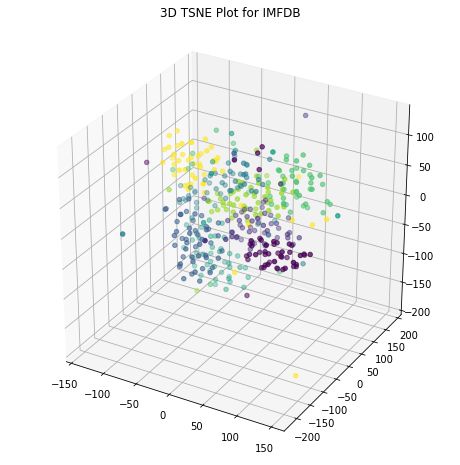

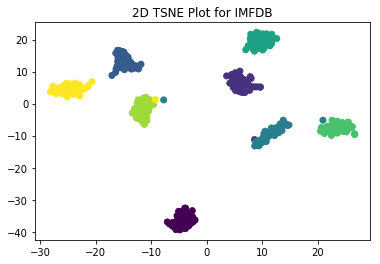

In [38]:
# Compute TSNE for different features and create a scatter plot
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

X = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 35), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
k = 3 # Number of components in TSNE

# Compute
X_TSNE3D = TSNE(n_components=3).fit_transform(X)
X_TSNE2D = TSNE(n_components=2).fit_transform(X)

# Plot the representation in 2d/3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text('3D TSNE Plot for IMFDB')
ax.scatter(X_TSNE3D[:,0],X_TSNE3D[:,1],X_TSNE3D[:,2],c=y)
plt.show()

plt.scatter(X_TSNE2D[:, 0], X_TSNE2D[:, 1], c=y)
plt.title('2D TSNE Plot for IMFDB')
plt.show()

Dataset shape: (672, 32, 32, 3)


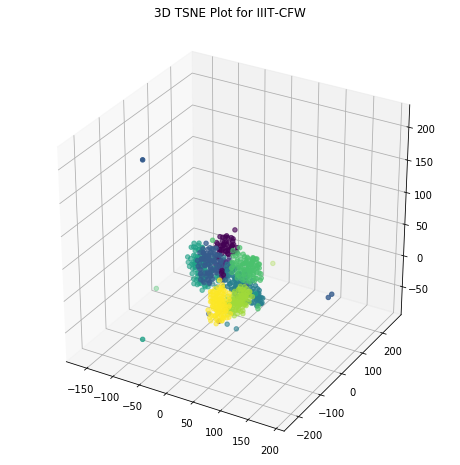

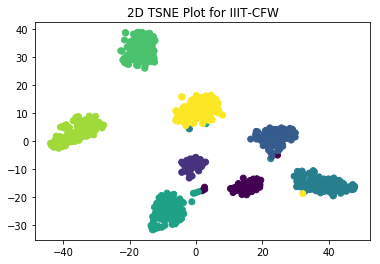

In [39]:
# Compute TSNE for different features and create a scatter plot
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

X = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 35), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
k = 3 # Number of components in TSNE

# Compute
X_TSNE3D = TSNE(n_components=3).fit_transform(X)
X_TSNE2D = TSNE(n_components=2).fit_transform(X)

# Plot the representation in 2d/3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text('3D TSNE Plot for IIIT-CFW')
ax.scatter(X_TSNE3D[:,0],X_TSNE3D[:,1],X_TSNE3D[:,2],c=y)
plt.show()

plt.scatter(X_TSNE2D[:, 0], X_TSNE2D[:, 1], c=y)
plt.title('2D TSNE Plot for IIIT-CFW')
plt.show()

Dataset shape: (165, 32, 32, 3)


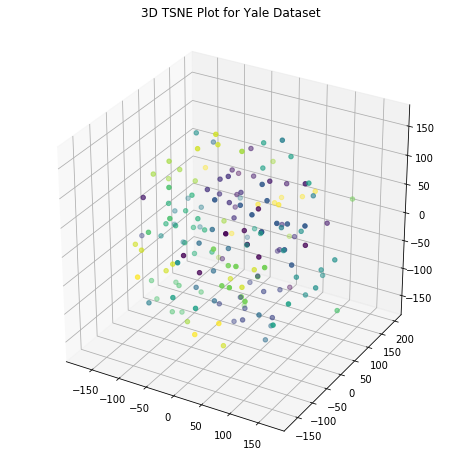

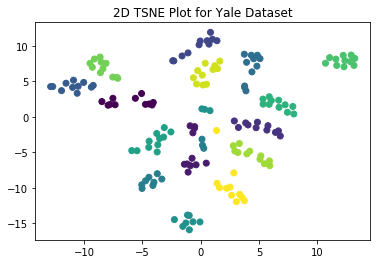

In [40]:
# Compute TSNE for different features and create a scatter plot
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

X = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 35), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
k = 3 # Number of components in TSNE

# Compute
X_TSNE3D = TSNE(n_components=3).fit_transform(X)
X_TSNE2D = TSNE(n_components=2).fit_transform(X)

# Plot the representation in 2d/3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text('3D TSNE Plot for Yale Dataset')
ax.scatter(X_TSNE3D[:,0],X_TSNE3D[:,1],X_TSNE3D[:,2],c=y)
plt.show()

plt.scatter(X_TSNE2D[:, 0], X_TSNE2D[:, 1], c=y)
plt.title('2D TSNE Plot for Yale Dataset')
plt.show()

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

- Find the K Nearest Neighbours of the face to be verified. If the ground truth class label is same as the label of the majority nearest neighbours, then verification succeeds. Else, it fails 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

- When doing face verification our aim is to reduce the number of false positives. We don't want a face to pass verification unless the classifier is 100% confident. False negatives is fine, but we can never allow false positives as this can become dangerous for security reasons. Hence, we try to maximize precision which is the ratio between number of true positives and sum of true positives and false positives.
_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations
- Refer plot

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as cm
class FaceVerification():
    def __init__(self):
        #super.__init__()
        self.model = KNeighborsClassifier()
        self.accuracy = 0
        self.recall = 0
        self.precision = 0
        self.F1 = 0
        self.confusion = []
        self.pred = []
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        verification_results = self.model.predict(X.reshape(1, -1))
        self.pred.append(verification_results)
        if verification_results[0] == class_id:
            return True
        return False
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.model.fit(X_train, y_train)
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        for i in range(X_validate.shape[0]):
            self.verify(X_validate[i], y_validate[i])
        
        for i in range(len(y_validate)):
            if y_validate[i] == self.pred[i]:
                self.accuracy += 1
        
        self.accuracy = self.accuracy * 100 / len(y_validate)
        self.precision = precision_score(y_validate, self.pred, average = 'macro')
        self.recall = recall_score(y_validate, self.pred, average='macro')
        # Calculate F1-score
        self.F1 = f1_score(y_validate, self.pred, average='macro')
        return

In [42]:
# Create a train and validation split and show your results 
from sklearn.model_selection import train_test_split

In [43]:
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("IMFDB Dataset")
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

# Print the table. (You can use Pandas)
idx = []
error = []
acc = []
f1 = []
dim = []
prec = []
rec = []

def f(clf, data):
    X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
    clf.train(X_train, y_train)
    clf.validate(X_test, y_test)
    error.append(100 - clf.accuracy)
    acc.append(clf.accuracy)
    f1.append(clf.F1)
    dim.append(data.shape[1])
    prec.append(clf.precision)
    rec.append(clf.recall)

idx.append('PCA')
data = get_pca(X, 124)
clf = FaceVerification()
f(clf, data)


idx.append('LDA')
data = get_lda(X, y, 5)
clf = FaceVerification()
f(clf, data)


idx.append('KPCA')
data = get_kernel_pca(X, 20)
clf = FaceVerification()
f(clf, data)


idx.append('KLDA')
data = get_kernel_lda(X, y, 5)
clf = FaceVerification()
f(clf, data)

idx.append('VGG')
data = get_vgg_features(dirpath)
clf = FaceVerification()
f(clf, data)

idx.append('ResNet')
data = get_resnet_features(dirpath)
clf = FaceVerification()
f(clf, data)

def compose(x, y):
    dataset = []
    for i in range(x.shape[0]):
        dataset.append(np.concatenate((x[i], y[i])))
    dataset = np.array(dataset)
    return dataset

idx.append('ResNet + VGG')
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = FaceVerification()
f(clf, data)


data = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 124), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
idx.append('All features')
clf = FaceVerification()
f(clf, data)

d = {'Dimension Space' : dim, 'Error' : error, 'Accuracy' : acc, 'Precision' : prec, 'Recall' : rec, 'F1' : f1}

df = pd.DataFrame(data = d, index = idx)
df

Dataset shape: (400, 32, 32, 3)
IMFDB Dataset


,Dimension Space,Error,Accuracy,Precision,Recall,F1
PCA,124,32.5,67.5,0.803571,0.675,0.686546
LDA,5,2.5,97.5,0.979167,0.975,0.974747
KPCA,20,32.5,67.5,0.727778,0.675,0.675237
KLDA,5,2.5,97.5,0.979167,0.975,0.974747
VGG,4096,7.5,92.5,0.933333,0.925,0.924495
ResNet,2048,10.0,90.0,0.928125,0.900,0.901015
ResNet + VGG,6144,0.0,100.0,1.000000,1.000,1.000000
All features,6310,0.0,100.0,1.000000,1.000,1.000000


In [44]:
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("IIIT-CFW Dataset")
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

# Print the table. (You can use Pandas)
idx = []
error = []
acc = []
f1 = []
dim = []
prec = []
rec = []

def f(clf, data):
    X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
    clf.train(X_train, y_train)
    clf.validate(X_test, y_test)
    error.append(100 - clf.accuracy)
    acc.append(clf.accuracy)
    f1.append(clf.F1)
    dim.append(data.shape[1])
    prec.append(clf.precision)
    rec.append(clf.recall)

idx.append('PCA')
data = get_pca(X, 309)
clf = FaceVerification()
f(clf, data)


idx.append('LDA')
data = get_lda(X, y, 5)
clf = FaceVerification()
f(clf, data)


idx.append('KPCA')
data = get_kernel_pca(X, 20)
clf = FaceVerification()
f(clf, data)


idx.append('KLDA')
data = get_kernel_lda(X, y, 5)
clf = FaceVerification()
f(clf, data)

idx.append('VGG')
data = get_vgg_features(dirpath)
clf = FaceVerification()
f(clf, data)

idx.append('ResNet')
data = get_resnet_features(dirpath)
clf = FaceVerification()
f(clf, data)

def compose(x, y):
    dataset = []
    for i in range(x.shape[0]):
        dataset.append(np.concatenate((x[i], y[i])))
    dataset = np.array(dataset)
    return dataset

idx.append('ResNet + VGG')
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = FaceVerification()
f(clf, data)


data = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 309), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
idx.append('All features')
clf = FaceVerification()
f(clf, data)

d = {'Dimension Space' : dim, 'Error' : error, 'Accuracy' : acc, 'Precision' : prec, 'Recall' : rec, 'F1' : f1}

df = pd.DataFrame(data = d, index = idx)
df

Dataset shape: (672, 32, 32, 3)
IIIT-CFW Dataset


,Dimension Space,Error,Accuracy,Precision,Recall,F1
PCA,309,64.705882,35.294118,0.412676,0.396875,0.342077
LDA,5,0.000000,100.000000,1.000000,1.000000,1.000000
KPCA,20,45.588235,54.411765,0.585714,0.556250,0.527953
KLDA,5,0.000000,100.000000,1.000000,1.000000,1.000000
VGG,4096,33.823529,66.176471,0.685764,0.643750,0.645253
ResNet,2048,1.470588,98.529412,0.988636,0.975000,0.980159
ResNet + VGG,6144,0.000000,100.000000,1.000000,1.000000,1.000000
All features,6495,0.000000,100.000000,1.000000,1.000000,1.000000


In [45]:
dirpath = './dataset/Yale_face_database/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
print("Yale Dataset")
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision

# Print the table. (You can use Pandas)
idx = []
error = []
acc = []
f1 = []
dim = []
prec = []
rec = []

def f(clf, data):
    X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.9, stratify = y, random_state = 23)
    clf.train(X_train, y_train)
    clf.validate(X_test, y_test)
    error.append(100 - clf.accuracy)
    acc.append(clf.accuracy)
    f1.append(clf.F1)
    dim.append(data.shape[1])
    prec.append(clf.precision)
    rec.append(clf.recall)

idx.append('PCA')
data = get_pca(X, 62)
clf = FaceVerification()
f(clf, data)


idx.append('LDA')
data = get_lda(X, y, 5)
clf = FaceVerification()
f(clf, data)


idx.append('KPCA')
data = get_kernel_pca(X, 20)
clf = FaceVerification()
f(clf, data)


idx.append('KLDA')
data = get_kernel_lda(X, y, 5)
clf = FaceVerification()
f(clf, data)

idx.append('VGG')
data = get_vgg_features(dirpath)
clf = FaceVerification()
f(clf, data)

idx.append('ResNet')
data = get_resnet_features(dirpath)
clf = FaceVerification()
f(clf, data)

def compose(x, y):
    dataset = []
    for i in range(x.shape[0]):
        dataset.append(np.concatenate((x[i], y[i])))
    dataset = np.array(dataset)
    return dataset

idx.append('ResNet + VGG')
data = compose(get_resnet_features(dirpath), get_vgg_features(dirpath))
clf = FaceVerification()
f(clf, data)


data = compose(get_kernel_pca(X, 35),
               compose(get_lda(X, y, 7), 
                    compose(get_pca(X, 62), 
                       compose(get_resnet_features(dirpath), get_vgg_features(dirpath)))))
idx.append('All features')
clf = FaceVerification()
f(clf, data)

d = {'Dimension Space' : dim, 'Error' : error, 'Accuracy' : acc, 'Precision' : prec, 'Recall' : rec, 'F1' : f1}

df = pd.DataFrame(data = d, index = idx)
df

Dataset shape: (165, 32, 32, 3)
Yale Dataset


,Dimension Space,Error,Accuracy,Precision,Recall,F1
PCA,62,23.529412,76.470588,0.722222,0.8,0.744444
LDA,5,0.000000,100.000000,1.000000,1.0,1.000000
KPCA,20,23.529412,76.470588,0.700000,0.8,0.731111
KLDA,5,0.000000,100.000000,1.000000,1.0,1.000000
VGG,4096,41.176471,58.823529,0.500000,0.6,0.511111
ResNet,2048,0.000000,100.000000,1.000000,1.0,1.000000
ResNet + VGG,6144,0.000000,100.000000,1.000000,1.0,1.000000
All features,6248,0.000000,100.000000,1.000000,1.0,1.000000


### Extenstion / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

Dataset shape: (672, 32, 32, 3)
Dataset shape: (400, 32, 32, 3)


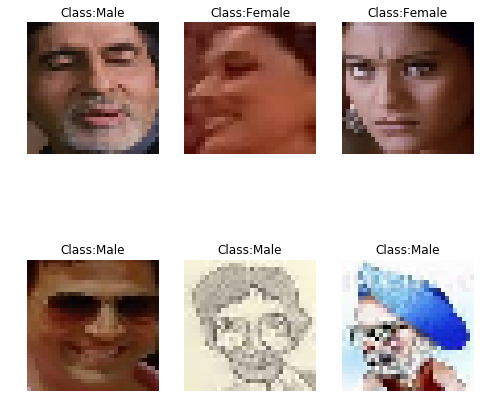

In [46]:
# Load data
dirpath = './dataset/IIIT-CFW/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))

dataset = []
labels = []
for i in range(X.shape[0]):
    if y[i] == 0 or y[i] == 1 or y[i] == 2 or y[i] == 4 or y[i] == 5 or y[i] == 6 or y[i] == 7:
        labels.append('Male')
    else:
        labels.append('Female')
    dataset.append(X[i])

dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N,H*W*C))
for i in range(X.shape[0]):
    if y[i] == 0 or y[i] == 1 or y[i] == 3 or y[i] == 5:
        labels.append('Female')
    else:
        labels.append('Male')
    dataset.append(X[i])

dataset = np.array(dataset)
labels = np.array(labels)
ind = np.random.randint(0,labels.shape[0],6)
disply_images(dataset[ind,...].reshape(-1, 32, 32, 3),labels[ind], row=2,col=3)

In [47]:
# Define your features
def conc(A, B):
    d = []
    for x in A:
        d.append(x)
    for x in B:
        d.append(x)
    d=np.array(d)
    return d
data = conc(compose(get_vgg_features('./dataset/IIIT-CFW/'), get_resnet_features('./dataset/IIIT-CFW/')),
            compose(get_vgg_features('./dataset/IMFDB/'), get_resnet_features('./dataset/IMFDB/')))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8, stratify = labels, random_state = 3)
x_train, x_test, Y_train, Y_test = train_test_split(dataset, labels, train_size = 0.8, stratify = labels, random_state = 3)
# Create your classifier
clf = Classifier(SVM = True)
clf.train(X_train, y_train)
# Validate your classifier
clf.validate(X_test, y_test)

Accuracy:  99.06976744186046


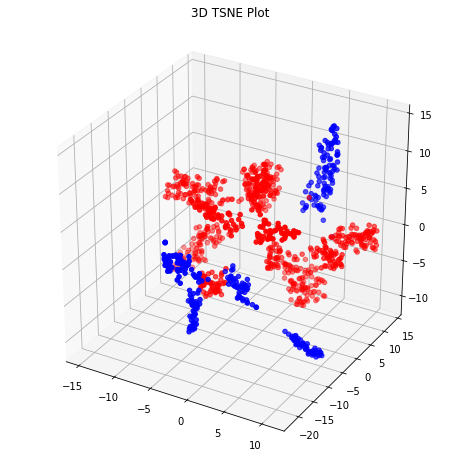

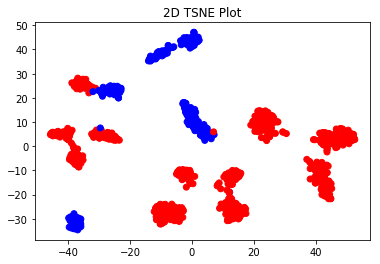

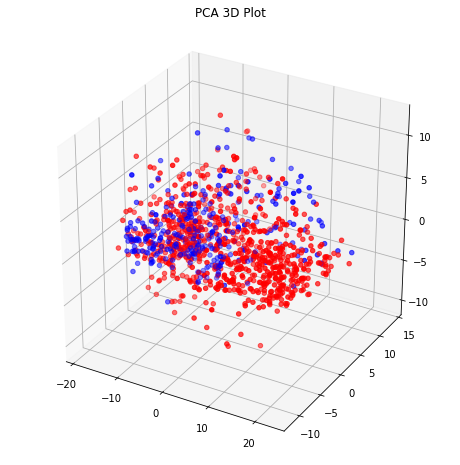

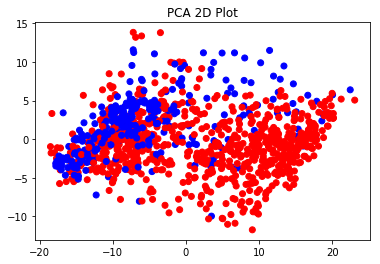

In [49]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc.
print("Accuracy: ", clf.accuracy)
X_TSNE3D = TSNE(n_components=3).fit_transform(data)
X_TSNE2D = TSNE(n_components=2).fit_transform(data)

colors = {'Male': 'red', 'Female': 'blue'}
c = [colors[i] for i in labels]
# # Plot the representation in 2d/3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text('3D TSNE Plot')
ax.scatter(X_TSNE3D[:,0],X_TSNE3D[:,1],X_TSNE3D[:,2],c=c)
plt.show()

plt.scatter(X_TSNE2D[:, 0], X_TSNE2D[:, 1], c=c)
plt.title('2D TSNE Plot')
plt.show()



fig = plt.figure(figsize=(8, 8))
X_3D = get_pca(dataset,3)
ax = fig.add_subplot(111, projection='3d')
ax.title.set_text('PCA 3D Plot')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=c)
plt.show()

X_2D = get_pca(dataset,2)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c = c)
plt.title('PCA 2D Plot')
plt.show()


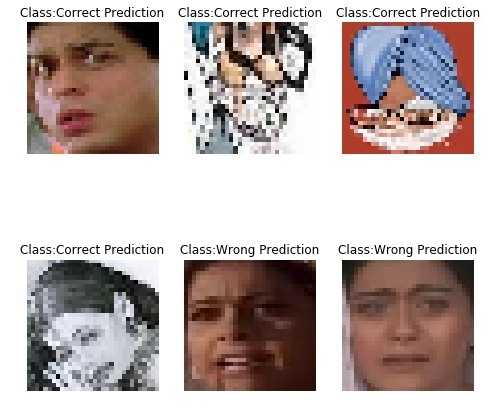

In [50]:
# Show quantitative results such as examples of correct prediction and wrong prediction
t = 0
f = 0
res = []
lab = []
for i in range(X_test.shape[0]):
    dat = []
    dat.append(X_test[i])
    dat = np.array(dat)
    if clf.classify(dat)[0] == y_test[i] and t <= 3:
        t = t + 1
        res.append(x_test[i])
        lab.append("Correct Prediction")
    if clf.classify(dat)[0] != y_test[i] and f <= 3:
        f = f + 1
        res.append(x_test[i])
        lab.append("Wrong Prediction")
res = np.array(res)
lab = np.array(lab)
disply_images(res.reshape(-1, 32, 32, 3), lab, row = 2, col = 3)